# Electricity Demand Forecasting


In [128]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [129]:
# import dataset
data = pd.read_csv("electricity demand dataset.csv")

In [130]:
data

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
43843,31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
43844,31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
43845,31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957
43846,31-Dec-24,22.0,1.0,12.0,2024.0,366.0,3.000000,51.998107,3353.241682


In [131]:
# check some basic information about  the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


In [132]:
# check the column datatype to datatime format
data['Timestamp']=pd.to_datetime(data['Timestamp'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12972\936446924.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp']=pd.to_datetime(data['Timestamp'])


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    43848 non-null  datetime64[ns]
 1   hour         43837 non-null  float64       
 2   dayofweek    43839 non-null  float64       
 3   month        43840 non-null  float64       
 4   year         43843 non-null  float64       
 5   dayofyear    43843 non-null  float64       
 6   Temperature  43841 non-null  float64       
 7   Humidity     43838 non-null  float64       
 8   Demand       43841 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.0 MB


In [134]:
# set the datetime column as Dataframe's index
data = data.set_index('Timestamp')

In [135]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [136]:
# using describe function to check the summary statistics
data[['Temperature','Humidity','Demand']].describe()

,Temperature,Humidity,Demand
count,43841.000000,43838.000000,43841.000000
mean,25.067788,59.903007,5000.790976
std,12.821725,18.342604,1412.527409
min,3.000000,20.000000,1611.954020
25%,15.210186,46.241224,4015.668472
50%,25.003212,59.986720,5013.053367
75%,34.740971,73.796820,6000.803082
max,50.000000,95.000000,11910.705100


In [137]:
# check for missing values
data.isnull().sum()

hour           11
dayofweek       9
month           8
year            5
dayofyear       5
Temperature     7
Humidity       10
Demand          7
dtype: int64

In [138]:
# to show the records that contain any null values
data[data.isna().any(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-04-30,NaN,3.0,4.0,2020.0,121.0,21.820261,41.353675,5393.127681
2020-07-21,NaN,1.0,7.0,2020.0,203.0,36.555833,62.779665,6248.349423
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-27,NaN,5.0,2.0,2021.0,58.0,24.001003,53.303268,4523.253789
2021-12-13,23.0,0.0,12.0,2021.0,NaN,3.000000,75.457130,3225.225822
2021-12-14,NaN,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612


In [139]:
# to show the records that contain all null values
data[data.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# drop those rows that contain all missing values
data.dropna(how='all')

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [141]:
# Forward fill
data[['hour','dayofweek','month','year','dayofyear']]=data[['hour','dayofweek','month','year','dayofyear']].ffill()

In [142]:
# Backward fill
data[['Temperature','Humidity']]=data[['Temperature','Humidity']].bfill()

In [143]:
data['Demand']=data['Demand'].interpolate(method='time')

In [144]:
# shape of dataframe
data.shape

(43848, 8)

In [145]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


## Feature Engineering

In [146]:
# create the 'Quarter' column in the dataset
data.insert(5,'quarter',data.index.quarter)
data

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,4,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,4,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,4,3.000000,40.565916,4015.979957


In [147]:
# convert the datastype from float to integer
data[['hour','dayofweek','month','year','dayofyear']]=data[['hour','dayofweek','month','year','dayofyear']].astype(int)

In [148]:
# create the 'Week of Year' column in the dataset
data.insert(5, 'weekofyear',data.index.isocalendar().week.astype(int))

In [149]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,3.000000,40.565916,4015.979957


In [150]:
# create a new column to check the weekend
data.insert(7, 'is_weekend',data.index.dayofweek.isin([5,6]))

In [151]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,False,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,False,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,False,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,False,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,False,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,False,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,False,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,False,3.000000,40.565916,4015.979957


In [152]:
data['is_weekend'] = data['is_weekend'].astype(int)

In [153]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957


In [154]:
# import holidays package
import holidays

In [155]:
data['Holidays']=holidays.IN(years= data.year)

In [156]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Holidays
Timestamp,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,NaN
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,NaN
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,NaN


In [178]:
data.drop('Holidays',axis=1)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hrs,Demand_lag_168hrs,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-26,0,6,1,2020,26,4,1,1,3.000000,60.870370,2269.269781,2326.004135,2045.840479,3488.464817,864.279055
2020-01-26,1,6,1,2020,26,4,1,1,3.000000,66.636161,2126.876544,2010.315712,2015.289393,3493.321518,855.898518
2020-01-26,2,6,1,2020,26,4,1,1,3.000000,35.166937,1701.103609,2145.228508,2106.330136,3474.816314,890.417683
2020-01-26,3,6,1,2020,26,4,1,1,7.293687,55.340520,2232.043496,2176.603551,1831.830411,3477.126312,886.968549
2020-01-26,4,6,1,2020,26,4,1,1,7.884211,68.241536,2447.327092,2312.912310,2253.748232,3482.726928,879.692218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,19,2,12,2024,360,52,4,0,9.678687,64.735916,4925.067853,5105.730509,5285.331736,4051.626237,960.815570
2024-12-25,20,2,12,2024,360,52,4,0,3.000000,64.531532,4434.787781,4673.672173,4408.760931,4041.672720,955.312941
2024-12-25,21,2,12,2024,360,52,4,0,5.779010,55.942017,4204.356480,3856.359014,4133.304646,4056.172615,955.018863


In [179]:
# lagged features: These are the past values of a time series data
# Use - Past demand values are strong predictors.They can be used as input to predict future values.

In [180]:
# Demand from the same hour yesterday,same hour last week
data['Demand_lag_24hrs']=data['Demand'].shift(24)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12972\2135009580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Demand_lag_24hrs']=data['Demand'].shift(24)


In [181]:
data['Demand_lag_168hrs']=data['Demand'].shift(168)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12972\254629897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Demand_lag_168hrs']=data['Demand'].shift(168)


In [182]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Holidays,Demand_lag_24hrs,Demand_lag_168hrs,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,,
2020-01-26,0,6,1,2020,26,4,1,1,3.000000,60.870370,2269.269781,Republic Day,NaN,NaN,3488.464817,864.279055
2020-01-26,1,6,1,2020,26,4,1,1,3.000000,66.636161,2126.876544,Republic Day,NaN,NaN,3493.321518,855.898518
2020-01-26,2,6,1,2020,26,4,1,1,3.000000,35.166937,1701.103609,Republic Day,NaN,NaN,3474.816314,890.417683
2020-01-26,3,6,1,2020,26,4,1,1,7.293687,55.340520,2232.043496,Republic Day,NaN,NaN,3477.126312,886.968549
2020-01-26,4,6,1,2020,26,4,1,1,7.884211,68.241536,2447.327092,Republic Day,NaN,NaN,3482.726928,879.692218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,19,2,12,2024,360,52,4,0,9.678687,64.735916,4925.067853,Christmas,5550.931602,7106.386486,4051.626237,960.815570
2024-12-25,20,2,12,2024,360,52,4,0,3.000000,64.531532,4434.787781,Christmas,4532.292575,6686.828194,4041.672720,955.312941
2024-12-25,21,2,12,2024,360,52,4,0,5.779010,55.942017,4204.356480,Christmas,4621.873971,6323.901090,4056.172615,955.018863


In [183]:
data.iloc[168:200]

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Holidays,Demand_lag_24hrs,Demand_lag_168hrs,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,,
2020-08-12,0,2,8,2020,225,33,3,0,20.713025,65.919889,4046.544805,Janmashtami,3876.671387,2269.269781,6042.725709,1192.041637
2020-08-12,1,2,8,2020,225,33,3,0,25.353331,61.617616,3953.672327,Janmashtami,4019.894881,2126.876544,6022.735555,1223.801903
2020-08-12,2,2,8,2020,225,33,3,0,28.896959,88.535057,3940.169036,Janmashtami,3561.482268,1701.103609,6014.510581,1237.608139
2020-08-12,3,2,8,2020,225,33,3,0,29.142788,90.962619,4025.120209,Janmashtami,3536.150286,2232.043496,6003.068463,1255.294230
2020-08-12,4,2,8,2020,225,33,3,0,31.029751,80.843231,4235.761862,Janmashtami,3780.454875,2447.327092,5995.609328,1265.631711
2020-08-12,5,2,8,2020,225,33,3,0,32.967466,89.288170,5016.938568,Janmashtami,4752.702575,2345.577035,5994.199356,1266.748418
2020-08-12,6,2,8,2020,225,33,3,0,39.572140,92.335372,6081.777438,Janmashtami,5102.314078,3654.895046,6006.722165,1266.036884
2020-08-12,7,2,8,2020,225,33,3,0,38.375535,74.983071,6537.763707,Janmashtami,5931.831603,4024.940366,6010.041555,1267.375519
2020-08-12,8,2,8,2020,225,33,3,0,39.204940,90.571238,6849.694334,Janmashtami,6051.621734,4298.866984,6015.040701,1270.570287


In [184]:
# Rolling mean & Rolling standard deviation
data['demand_rolling_mean_24hr'] = data['Demand'].rolling(window=24).mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12972\1212128472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['demand_rolling_mean_24hr'] = data['Demand'].rolling(window=24).mean()


In [185]:
data['demand_rolling_std_24hr'] = data['Demand'].rolling(window=24).std()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12972\2439894208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['demand_rolling_std_24hr'] = data['Demand'].rolling(window=24).std()


In [186]:
data.head(27)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Holidays,Demand_lag_24hrs,Demand_lag_168hrs,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,,
2020-01-26,0,6,1,2020,26,4,1,1,3.000000,60.870370,2269.269781,Republic Day,NaN,NaN,NaN,NaN
2020-01-26,1,6,1,2020,26,4,1,1,3.000000,66.636161,2126.876544,Republic Day,NaN,NaN,NaN,NaN
2020-01-26,2,6,1,2020,26,4,1,1,3.000000,35.166937,1701.103609,Republic Day,NaN,NaN,NaN,NaN
2020-01-26,3,6,1,2020,26,4,1,1,7.293687,55.340520,2232.043496,Republic Day,NaN,NaN,NaN,NaN
2020-01-26,4,6,1,2020,26,4,1,1,7.884211,68.241536,2447.327092,Republic Day,NaN,NaN,NaN,NaN
2020-01-26,5,6,1,2020,26,4,1,1,4.729661,40.460160,2345.577035,Republic Day,NaN,NaN,NaN,NaN
2020-01-26,6,6,1,2020,26,4,1,1,14.761162,78.385428,3654.895046,Republic Day,NaN,NaN,NaN,NaN
2020-01-26,7,6,1,2020,26,4,1,1,13.821524,77.714898,4024.940366,Republic Day,NaN,NaN,NaN,NaN
2020-01-26,8,6,1,2020,26,4,1,1,16.771857,62.985668,4298.866984,Republic Day,NaN,NaN,NaN,NaN


In [187]:
# drop all rows having null values
data=data.dropna()

In [188]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Holidays,Demand_lag_24hrs,Demand_lag_168hrs,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,,
2020-08-12,0,2,8,2020,225,33,3,0,20.713025,65.919889,4046.544805,Janmashtami,3876.671387,2269.269781,5448.044313,1077.106944
2020-08-12,1,2,8,2020,225,33,3,0,25.353331,61.617616,3953.672327,Janmashtami,4019.894881,2126.876544,5445.285040,1081.002344
2020-08-12,2,2,8,2020,225,33,3,0,28.896959,88.535057,3940.169036,Janmashtami,3561.482268,1701.103609,5461.063656,1054.755395
2020-08-12,3,2,8,2020,225,33,3,0,29.142788,90.962619,4025.120209,Janmashtami,3536.150286,2232.043496,5481.437402,1020.110516
2020-08-12,4,2,8,2020,225,33,3,0,31.029751,80.843231,4235.761862,Janmashtami,3780.454875,2447.327092,5500.408527,990.917756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,19,2,12,2024,360,52,4,0,9.678687,64.735916,4925.067853,Christmas,5550.931602,7106.386486,4067.122746,972.368003
2024-12-25,20,2,12,2024,360,52,4,0,3.000000,64.531532,4434.787781,Christmas,4532.292575,6686.828194,4063.060047,970.541932
2024-12-25,21,2,12,2024,360,52,4,0,5.779010,55.942017,4204.356480,Christmas,4621.873971,6323.901090,4045.663484,963.808480


## Data Visualization

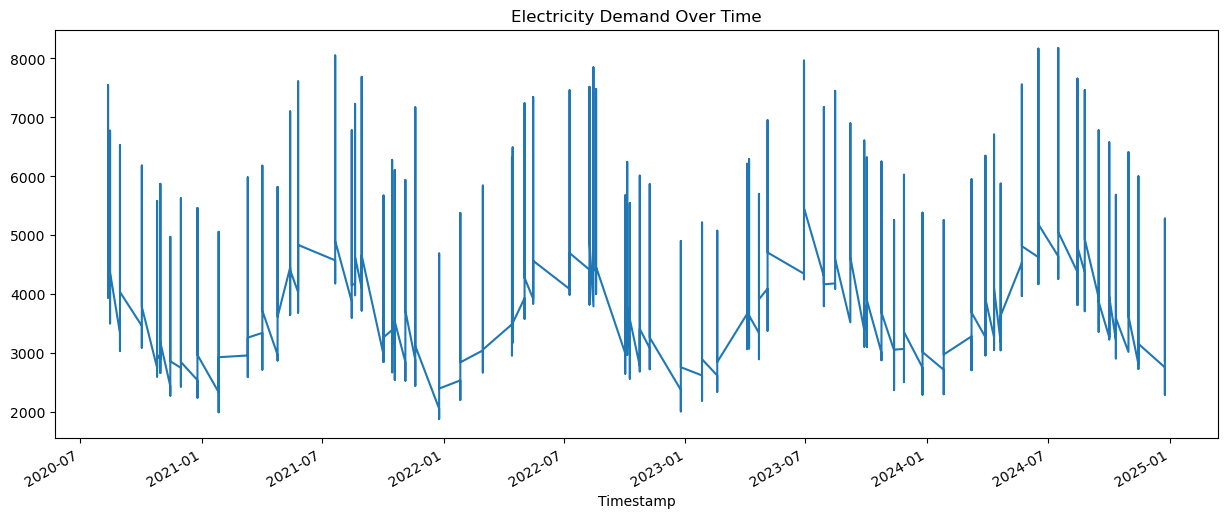

In [189]:
# plot raw demand over time
data['Demand'].plot(figsize=(15,6), title='Electricity Demand Over Time')
plt.show()

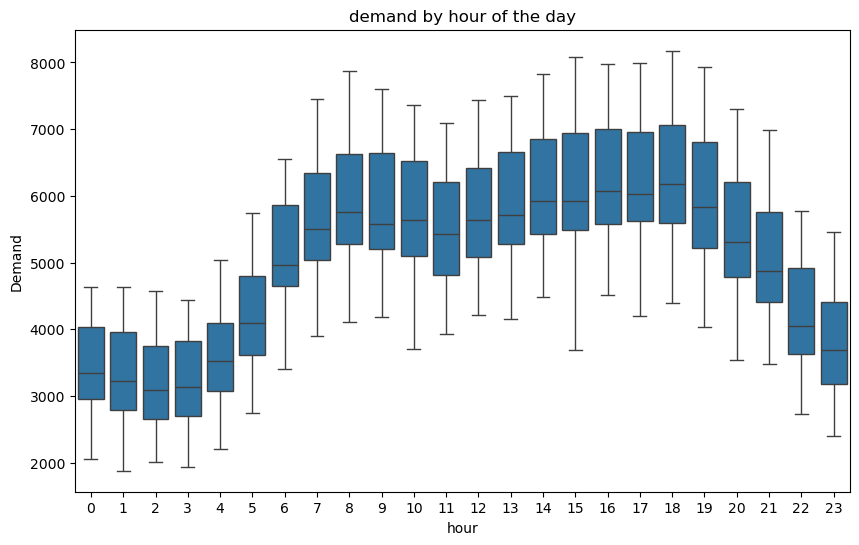

In [190]:
# Visualize demand by hour of day
plt.figure(figsize =(10,6))
sns.boxplot(data = data,x = 'hour', y = 'Demand')
plt.title("demand by hour of the day")
plt.show()

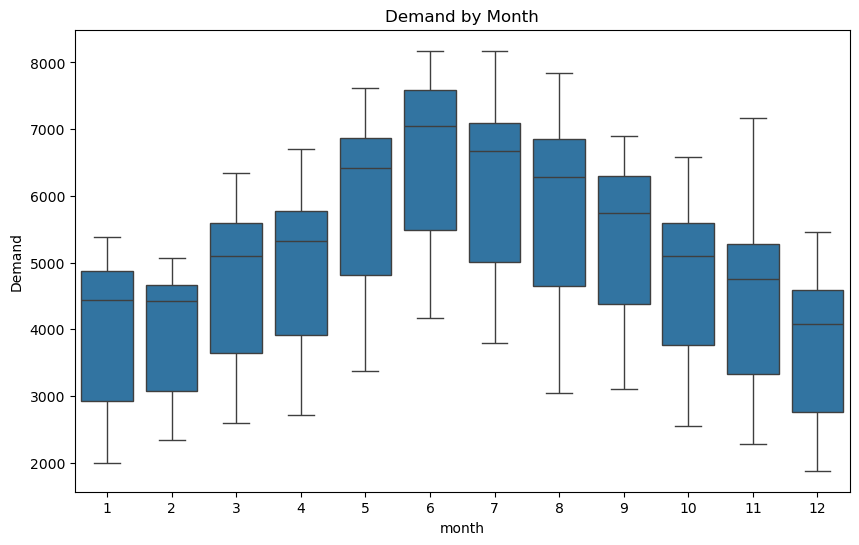

In [191]:
# Visualize demand by month
plt.figure(figsize=(10,6))
sns.boxplot(data = data, x = 'month', y = 'Demand')
plt.title("Demand by Month")
plt.show()

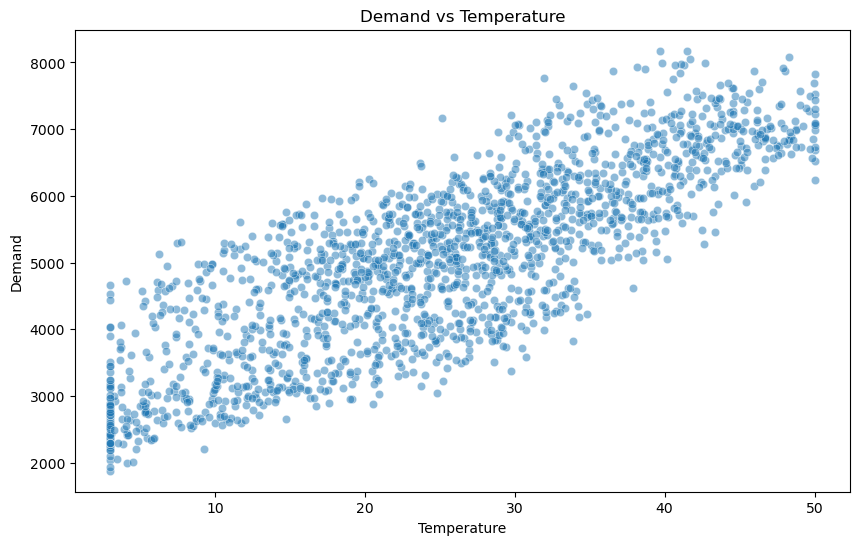

In [192]:
# Scatter plot of Demand vs Temperature
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x= 'Temperature', y= 'Demand', alpha = 0.5)
plt.title("Demand vs Temperature")
plt.show()

In [193]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True, fmt= ".2f")
plt.title("Correlation Matrix of Features")
plt.show()

ValueError: could not convert string to float: 'Janmashtami'

## Machine Learning 

In [ ]:
data

In [ ]:
# defining target variable (Y)
Y = data.Demand                           # target variable

In [ ]:
Y

In [ ]:
# defining independent variable (x)
X = data.drop('Demand', axis=1)          # independent variable

In [ ]:
X

In [ ]:
# Splitting the data into training and testing data
X_train = X.loc[: '2023-12-31']                            # taking 80% of data as testing data

In [ ]:
X_train

In [ ]:
Y_train = Y.loc[: '2023-12-31']                      # taking 80% of data as training data

In [ ]:
Y_train

In [ ]:
X_test = X.loc['2024-01-01' :]                      # taking 20% of data as testing data

In [ ]:
X_test

In [ ]:
Y_test = Y.loc['2024-01-01' :]                      # taking 20% of data as testing data

In [ ]:
Y_test

In [ ]:
print (X_train.shape)
print (Y_train.shape)

In [ ]:
print(X_test.shape)
print(Y_test.shape)

## XGBoost

In [ ]:
from xgboost import XGBRegressor            # from XGBoost library we are importing XGBRegressor class

# from sklearn library importing two fundamental metrics to evaluate the performance of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# from model_selection module of scikit-learn's library, import TimeSeriesSplit class
# TimeSeriesSplit class perform appropriate cross validation when dealing with time series data
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
# Initialize and the final the model

model_xgb = XGBRegressor(n_estimators = 1000,
                        early_stopping_rounds = 50,
                        learning_rate = 0.01,
                        random_state =42,
                        objective = 'reg:squarederror')

 In short:
The XGBReggressor initailiztion creates a model that will train for up tp 1000 boosting rounds (trees)but will stop early if performance on a validation set doesn't improve for 50 consecutive rounds.

Each tree's contribution is scaled down by a learning rate of 0.01 to prevent overfitting.

This model is designed to minimize the squared error for regression taskes

In [ ]:
model_xgb.fit(X_train, Y_train, eval_set = [(X_train, Y_train),(X_test, Y_test)],verbose = False)

In [ ]:
# Make predication
predictions_xgb = model_xgb.predict(X_test)

In [ ]:
# Evaluating the model

rmse_xgb = np.sqrt(mean_squared_error(Y_test, predictions_xgb))
mae_xgb = mean_absolute_error(Y_test, predictions_xgb)

In [ ]:
print("XGBoost RMSE:", rmse_xgb)
print("XGBoost MAE:", mae_xgb)

In [ ]:
# Visualize the Predictions

plt.figure(figsize = (15,6))
plt.plot (Y_test.index, Y_test, label = 'Actual Demand', color= 'Red')
plt.plot (Y_test.index, predictions_xgb, label = 'Predicted Demand', color = 'Green', linestyle='--')
plt.title('XGBoost Electricity Demand Prediction')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [ ]:
# save the model 
import joblib
joblib.dump(model_xgb,'electricity_xgb_prediction_model.pkl')

In [ ]:
# load and use:
loaded_model = joblib.load('electricity_xgb_prediction_model.pkl')

# future_prediction = loaded_model.predict(X_future)

In [ ]:
loaded_model